In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
comments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/GBcomments.csv',error_bad_lines=False) 
# we used error_bad_lines= False because of ParseError

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [ ]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [ ]:
# for sentimental analysis import this library
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity
# it check the sentiment polarity of this line

0.45000000000000007

In [ ]:
comments.isna().sum()
# check whether we have null values in data. for this we use isna() and sum() for summation of all missing value present in data.

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [ ]:
comments.dropna(inplace=True)
#here dropna is used to delete the missing data and inplace= True for update the data in place at well.

In [ ]:
# to perform sentimental analysis on comment_text data and append on polarity

polarity=[]
for i in comments['comment_text']:
  polarity.append(TextBlob(i).sentiment.polarity)


In [ ]:
#add these polarity in dataframe so that we define a new column on dataframe 
comments['polarity']=polarity

In [ ]:
# it return the first 5 row
comments.head()

In [ ]:
comments.head(20)

In [ ]:
# for positive sentiment or we can say for +ve polarity

comm_pos = comments[comments['polarity']==1]

In [ ]:
comm_pos.shape
#(no. of rows, no. of column )

In [ ]:
comm_pos.head()

In [ ]:
# wordcloud is a kind of functionality form which we find which word is useful from chunk of data. e.g bigger the word priority is bigger also.

!pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS
# stopwords are the word which have no meaning e.g he,she,it.... 

In [ ]:
stopwords = set(STOPWORDS)
# for unique stopword

In [ ]:
total_comments = ' '.join(comm_pos['comment_text'])
#collect all comment_text data in a string using join()

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)
# to generate word cloud from total_comments data

In [ ]:
# using matplotlib to figure
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# for negative sentiment or we can say for -ve polarity

comm_neg = comments[comments['polarity']==-1]

In [ ]:
total_comments = ' '.join(comm_neg['comment_text'])
#collect all comment_text data in a string using join()

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

In [ ]:
# using matplotlib to figure
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# to analysis the trending tags on youtube
videos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/GBvideos.csv',error_bad_lines=False)

In [ ]:
videos.head()

In [ ]:
tags_complete = ' '.join(videos['tags'])

In [ ]:
tags_complete

In [ ]:
import re
# to remove special character import re e.g regular expresions.

In [ ]:
tags = re.sub('[^a-zA-Z]',' ',tags_complete)
#this line means apart from a-z or A-Z replace with space' '

In [ ]:
tags

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios    this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David

In [ ]:
# to remove extra space
tags = re.sub(' +',' ',tags)

In [ ]:
tags

'apple events apple event iphone iphone x iphone plus iphone s iphone s plus ios this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows topic chat show topic talk shows topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand Magazine Mag Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa fut fut fifa ratings fifa ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa Hazard Fifa David Luiz Fifa Christensen Fifa Chelsea Fifa

In [ ]:
wordcloud = WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

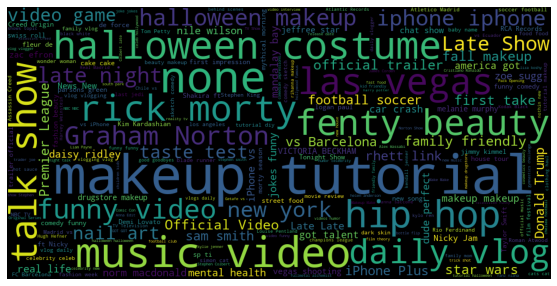

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# perform analysis on likes,views

In [ ]:
sns.regplot(data=vedios,x ='views',y='likes')
# regression plot is very helpful when we define relation between two.

plt.title('Regression Plot for views and likes')

NameError: ignored

In [ ]:
# perform analysis on dislikes,views

In [ ]:
sns.regplot(data=vedios,x ='views',y='dislikes')
# regression plot is very helpful when we define relation between two.

plt.title('Regression Plot for views and dislikes')

In [ ]:
# for how they are corelated to each other


In [ ]:
df_corr = videos[['views','likes','dislikes']]

In [ ]:
df_corr.corr()

In [ ]:
sns.heatmap(df_corr.corr())

In [ ]:
sns.heatmap(df_corr.corr(),annot = True)

In [ ]:
# analysis of emoji

In [ ]:
!pip install emoji 
# emoji library

In [ ]:
import emoji

In [ ]:
len(comments)

In [ ]:
comment = comments['comment_text'][1]
# for only 1 row 

In [ ]:
[c for c in comment if cin emoji.UNICODE_EMOJI]
# it show the emojis of 1st row

In [ ]:
str = ''
for i in comments['comment_text']:
  list = [c for c in comment if cin emoji.UNICODE_EMOJI]
  for ele in list:
    str = str+ele
# store emojis in str

In [ ]:
len(str)

In [ ]:
str

In [ ]:
#prepare a dictionary key as a emoji and value is count
result={}
for i in set(str):
  result[i] = str.count(i)


In [ ]:
result

In [ ]:
# sort data in increasing order
final={}
for key,value in sorted(result.items(),key = lambda item:item[1]):
  final[key]=value

In [ ]:
#when we need data in form of list e.g convert dictionary into list then we have to inzip this 

keys = [*final.keys()]

values = [*final.values()]

In [ ]:
# need of dataframe in which only top 20 is their

df = pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [ ]:
df

In [ ]:
# visualize emojis data

import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
trace = go.Bar(
    x = df['chars'],
    y = df['num']
)

In [ ]:
iplot([trace])